In [1]:
import analysis as a
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
resonances = np.array([0.8,1.6,2.4,3.2,4.0])
print("Best diameters (micrometers):",a.invert_FSR_resonances(resonances))

Best diameters (micrometers): [274.69091292 137.34545646  91.56363764  68.67272823  54.93818258]


Central wavelength: 1556.755000000014
Offset: 9.835000000013906


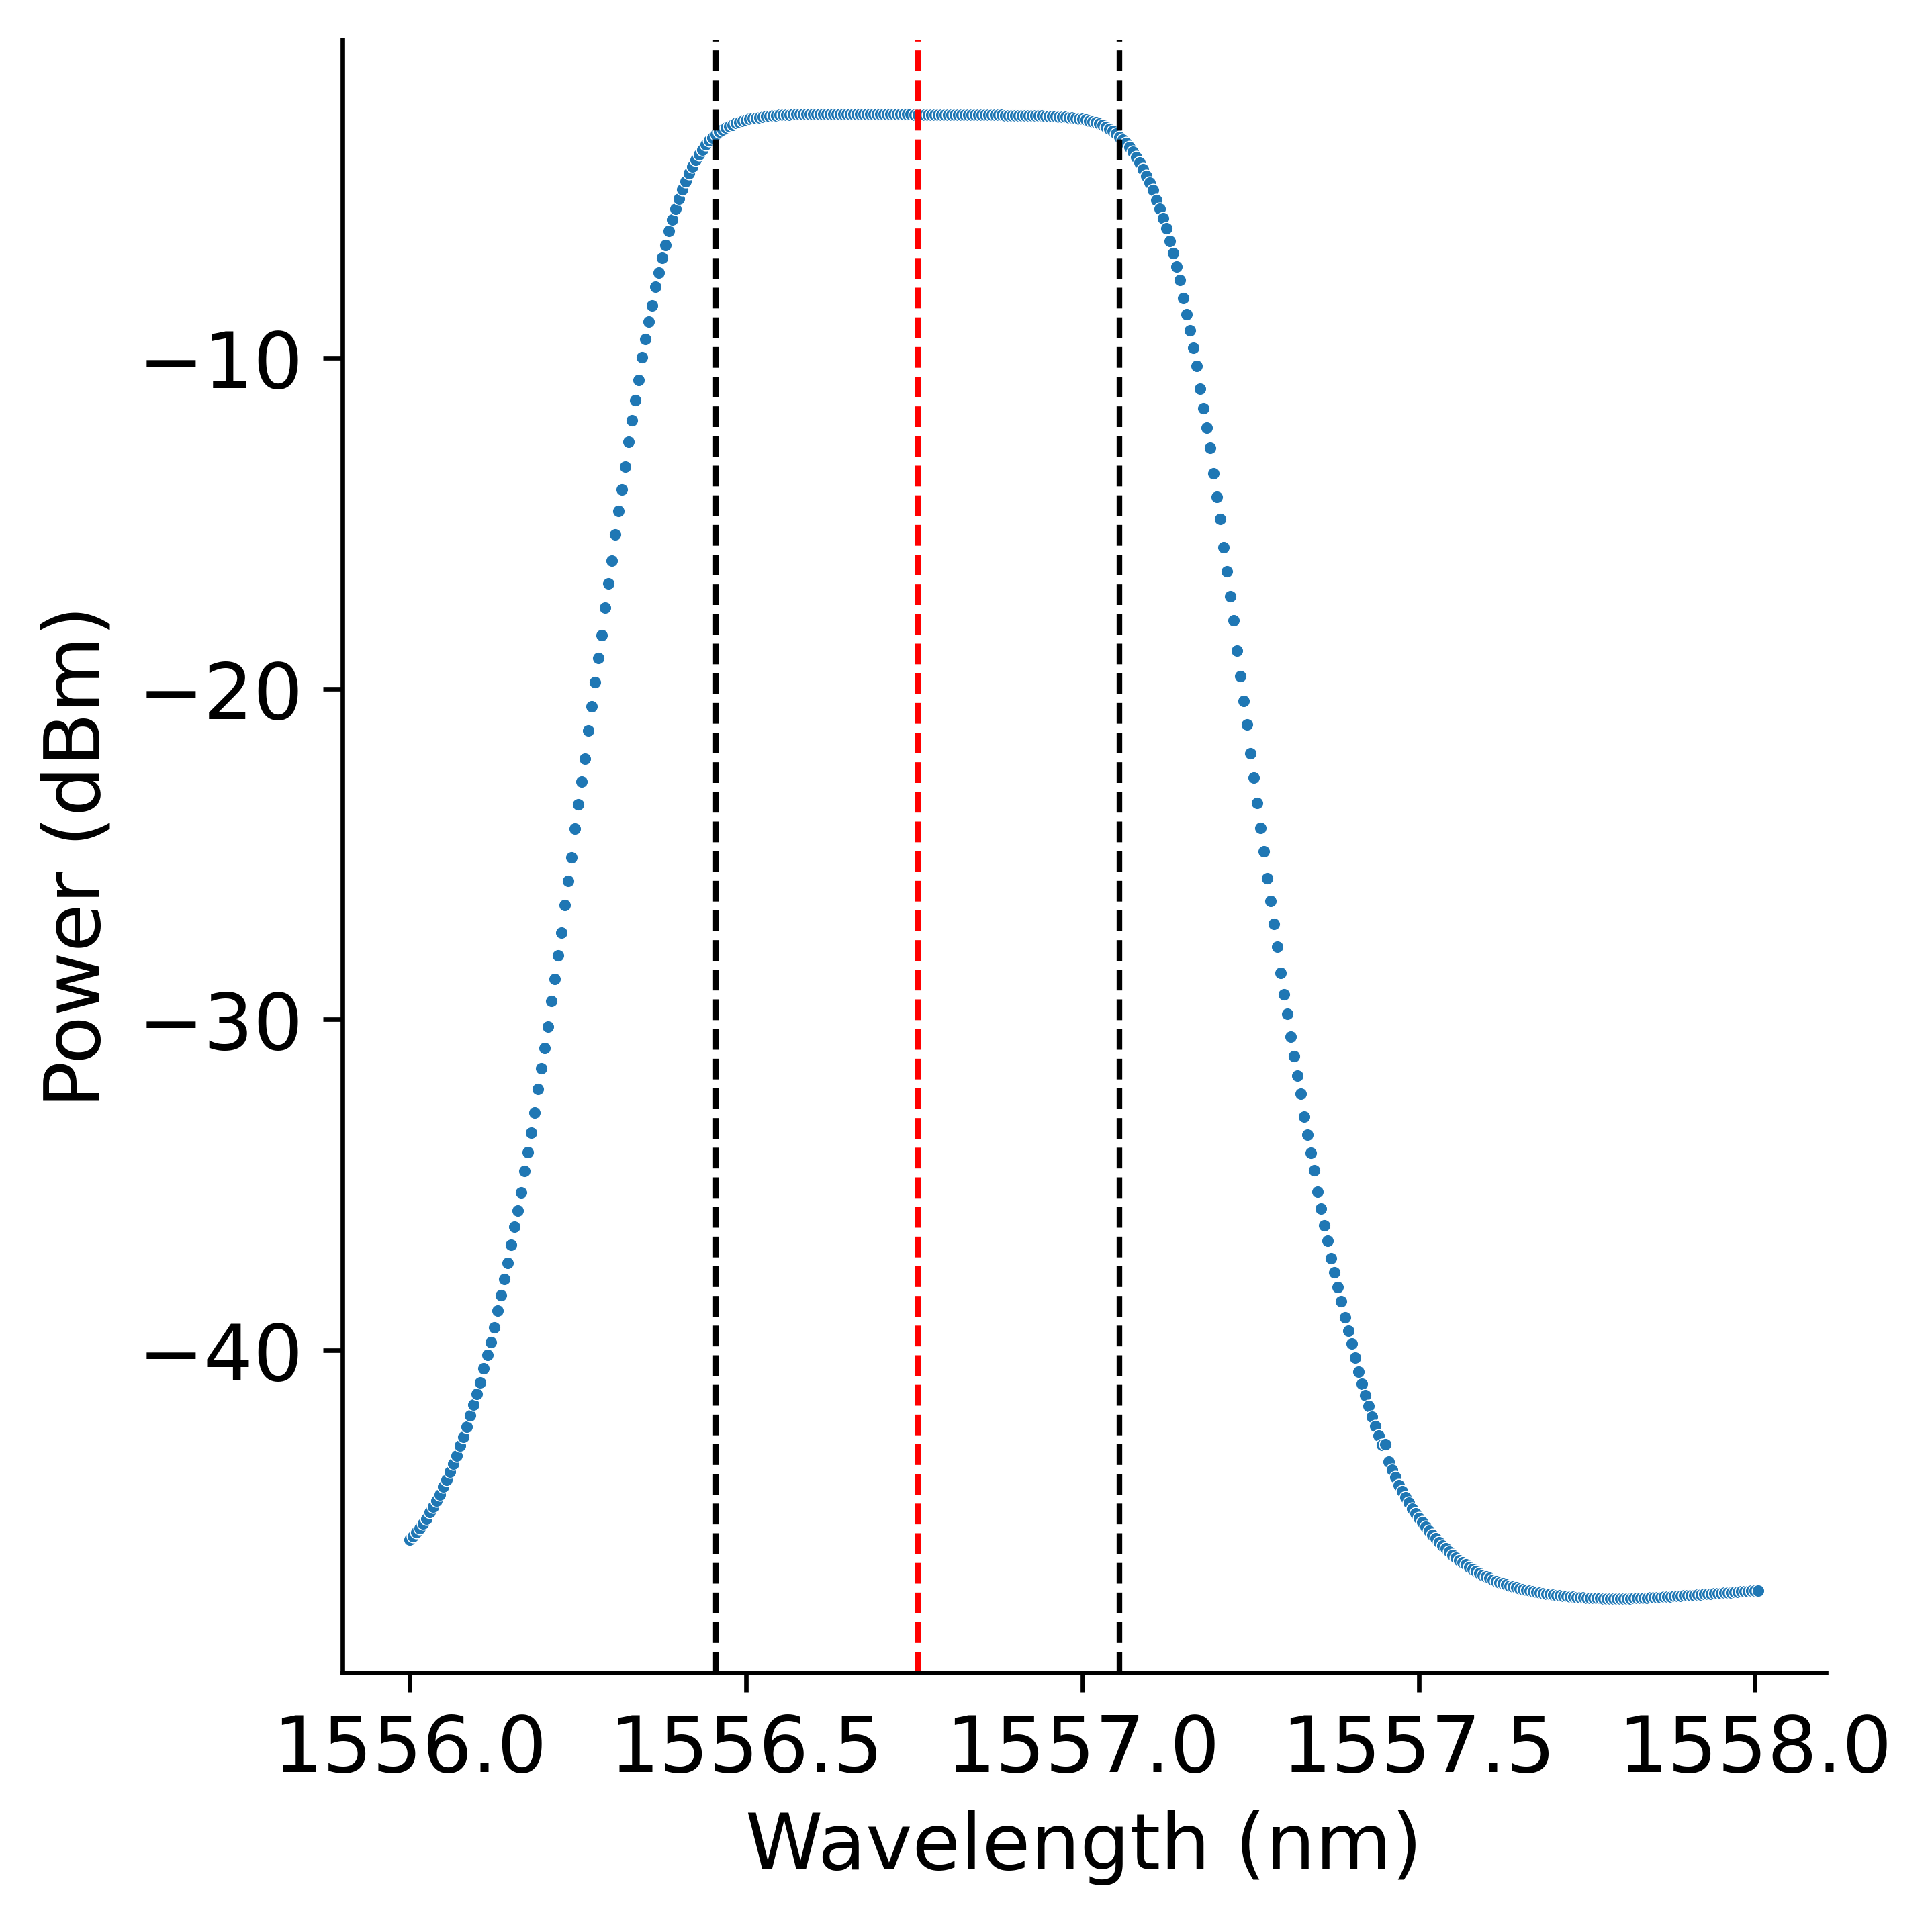

In [31]:
#find TUNICS laser offset
plt.rcParams["figure.dpi"]=600
plt.rcParams["font.size"]=14

path = r"C:\Users\pmesp\OneDrive\Documents\bristol-chip-experiment\Data\17-11-2022\17-11-2022_12-57_laser_sweep_samples_100_sensitivity_1547_TUNICS_1556_1558_402_WDM_SN_2020071009.txt"
tunics = pd.read_csv(path,index_col=0)
tunics["mean_dbm"] = tunics.mean(axis=1)
tunics["Wavelength(nm)"] = tunics.index
tunics["mean_dbm"].idxmax()
wavelength = tunics["mean_dbm"].idxmax()+0.12
print("Central wavelength:",wavelength)
print("Offset:",wavelength-1546.92)
plot = sns.relplot(data=tunics,x="Wavelength(nm)",y="mean_dbm",s=5)
plot.set_axis_labels("Wavelength (nm)", "Power (dBm)")
plt.axvline(wavelength,color='r',linestyle='--',linewidth=1)
width = 0.3
plt.axvline(wavelength-width,color='k',linestyle='--',linewidth=1)
plt.axvline(wavelength+width,color='k',linestyle='--',linewidth=1)
plt.show()

In [12]:
laser_offset = 9.835

path = "../Data/01-12-2022/01-12-2022_16-21_resonance_finding_samples_100_sensitivity_1550_TUNICS_3_angela_ring_11.txt"
path2 = "../Data/01-12-2022/01-12-2022_16-51_resonance_finding_samples_100_sensitivity_1550_TUNICS_3_angela_ring_11.txt"
path3 = "../Data/06-12-2022/06-12-2022_15-46_resonance_finding_samples_100_sensitivity_1550_TUNICS_6_angela_ring_9.txt"
path4 = "../Data/06-12-2022/06-12-2022_17-24_resonance_finding_samples_100_sensitivity_1550_TUNICS_4.txt"

data = pd.read_csv(path, index_col=0)

data2 = pd.read_csv(path2,index_col = 0)
data3 = pd.read_csv(path3,index_col = 0)
data4 = pd.read_csv(path4,index_col = 0)


frames = [data,data2,data3,data4]

#subtract average before finding peaks
for dataframe in frames:
    
    mean = dataframe.mean(axis=1).mean()
    dataframe["normalised_mean_dbm"] = dataframe.mean(axis = 1) - mean
df = pd.concat(frames)

df["mean_dbm"] = df.mean(axis=1)
df["variance"] = df.var(axis=1)
df["std"] = np.sqrt(df["variance"])
df.index-=laser_offset
df["Wavelength(nm)"] = df.index
powers = df["normalised_mean_dbm"]*-1
powers

wavelength_nm 
1531.835    0.352568
1531.837    0.344292
1531.839    0.336796
1531.841    0.331622
1531.843    0.328081
              ...   
1561.109   -0.288261
1561.111   -0.296873
1561.113   -0.311283
1561.115   -0.315816
1561.117   -0.332670
Name: normalised_mean_dbm, Length: 8520, dtype: float64

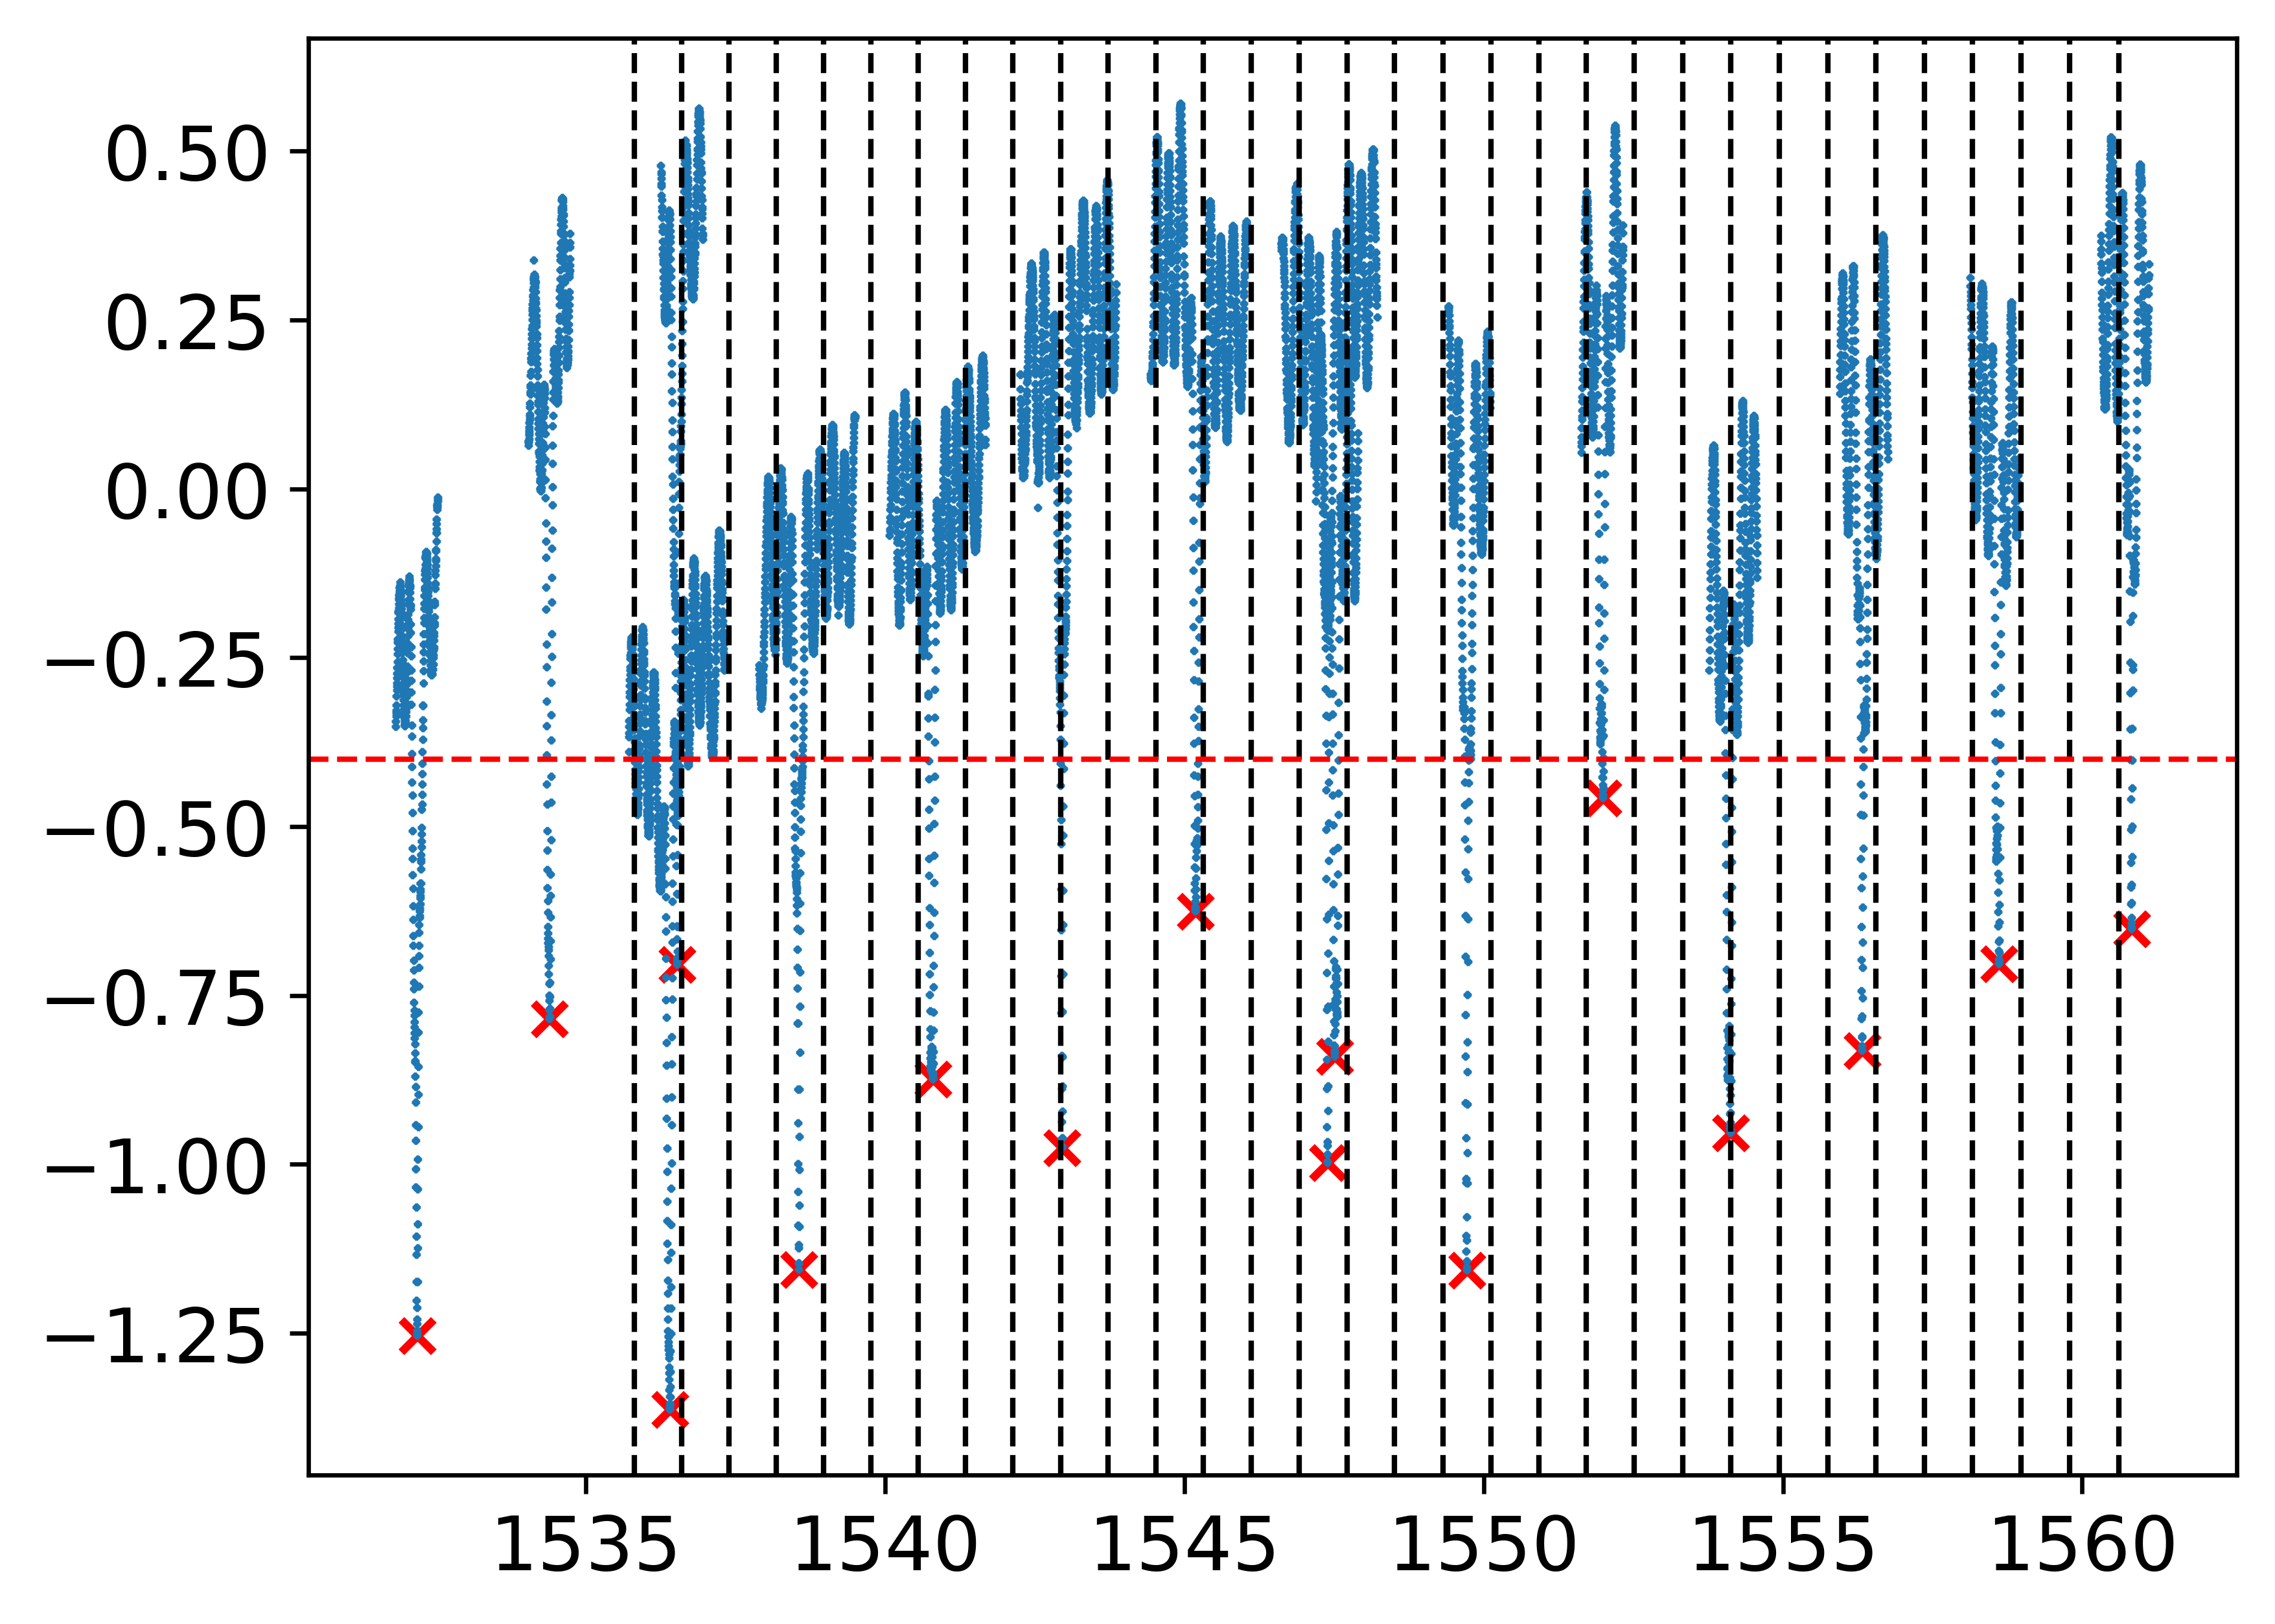

Resonances occuring at Float64Index([1532.19,  1534.4, 1536.53, 1547.52, 1549.72,  1552.0, 1536.41,
              1538.56,  1540.8, 1542.96, 1545.19,  1547.4, 1554.12, 1556.32,
              1558.61, 1560.83],
             dtype='float64', name='wavelength_nm ')


In [19]:
DWDM = a.get_DWDM_wavelengths()
height = 0.4
minima,_ = find_peaks(powers.values, distance = 300, height = height)

df['min'] = df.iloc[minima]['normalised_mean_dbm']
# # Plot results

plt.scatter(df.index, df['min'],marker='x',c='r')
plt.plot(df.index, df['normalised_mean_dbm'],'x',markersize=1)
for i in DWDM:
    plt.axvline(i,linestyle = '--',color='k',linewidth=1)
    
plt.axhline(-height,linestyle='--',color='r',linewidth=1)
plt.show()

print(f"Resonances occuring at {np.round(df.index[minima],2)}")

In [30]:
resonance_peaks = np.sort(df.iloc[minima].index.values)

#remove bad resonances
mask = (resonance_peaks<=DWDM[0]) & (resonance_peaks>=DWDM[-1])
resonance_peaks = resonance_peaks[mask]
diff = [resonance_peaks[i]-resonance_peaks[i-1] for i in range(1,len(resonance_peaks))]
for i,peak in enumerate(resonance_peaks):
    diff_arr = np.array([wave - peak for wave in DWDM])
    abs_diff_arr = abs(diff_arr)
    channel = np.argmin(abs_diff_arr)
    print(f"The closest channel to resonance {i+1} at {np.round(peak,3)}nm is {channel+21} at {DWDM[channel]}nm, {np.round(diff_arr[channel],2)}nm away")

The closest channel to resonance 1 at 1536.415nm is 51 at 1536.61nm, 0.2nm away
The closest channel to resonance 2 at 1536.533nm is 51 at 1536.61nm, 0.08nm away
The closest channel to resonance 3 at 1538.565nm is 49 at 1538.19nm, -0.37nm away
The closest channel to resonance 4 at 1540.805nm is 46 at 1540.56nm, -0.24nm away
The closest channel to resonance 5 at 1542.963nm is 43 at 1542.94nm, -0.02nm away
The closest channel to resonance 6 at 1545.189nm is 40 at 1545.32nm, 0.13nm away
The closest channel to resonance 7 at 1547.397nm is 37 at 1547.72nm, 0.32nm away
The closest channel to resonance 8 at 1547.516nm is 37 at 1547.72nm, 0.2nm away
The closest channel to resonance 9 at 1549.721nm is 34 at 1550.12nm, 0.4nm away
The closest channel to resonance 10 at 1551.999nm is 32 at 1551.72nm, -0.28nm away
The closest channel to resonance 11 at 1554.125nm is 29 at 1554.13nm, 0.01nm away
The closest channel to resonance 12 at 1556.325nm is 26 at 1556.55nm, 0.23nm away
The closest channel to r

In [29]:
a=np.array([12,3,4,5])
mask = np.logical_and(a<6,a>3)
mask = (a<6) & (a>3)
mask

array([False, False,  True,  True])